# 01_DimRed_Ex2 : PCA

## Exercise extra: Digits
The goal of the exercise is to perform PCA on a dataset containing hand-written digits. 
The dataset contains 1797 8x8 images of digits in the range 0-9.
How can PCA help in the recognition of different digits?

1. Load the data and show first image

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits_images = load_digits().data  # images dataset size 1767x64
digits_labels = load_digits().target # images labels size 1767

print(digits_images.shape) #check the dimensions

(1797, 64)


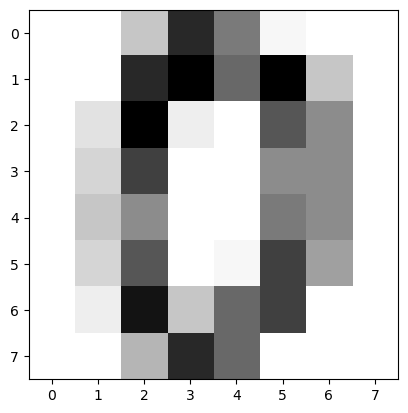

Image index: 0


In [2]:
# select the index of the digit to show
index = 0
Npix = 8 
# select the image and reshape it to show it
digit = digits_images[index,:].reshape(Npix,Npix)
plt.imshow(digit, cmap='Greys')
plt.xticks(np.linspace(0, 7, 8))
plt.yticks(np.linspace(0, 7, 8))
plt.show()

# print the label corresponding to the image
print(f'Image index: {digits_labels[index]}')

 - Perform PCA using sklearn decomposition (see exercise on Eigenfaces)
 - Obtain A, Z

In [3]:
# PCA
# We import the PCA object from the sklearn package
from sklearn.decomposition import PCA

pca = PCA(n_components=Npix**2) # we select all the features for now
pca.fit(digits_images)


# We calculate the matrix A, which contains the directions of the PCs
A = pca.components_.T

# Then we calculate the PCA scores as Z = X A
Z = digits_images @ A


To be sure that we have perfomed well the PCA, let's
 - Plot explained variance and cumulative explained variance
 - Plot first 3 PCs

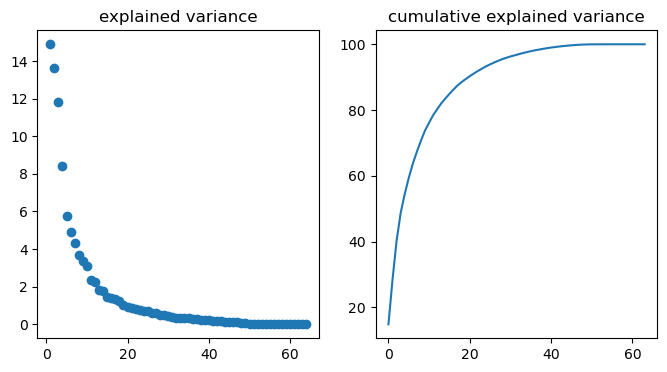

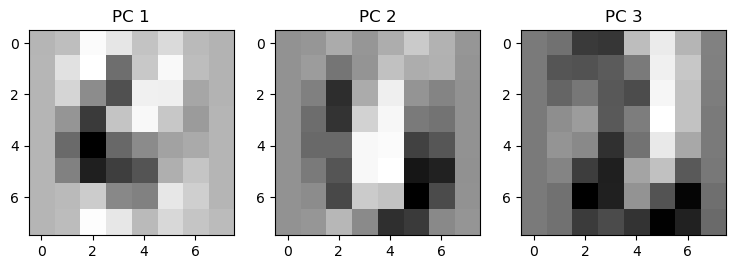

In [4]:
# We use the attributes of PCA to find the explained variance in percentage
variance_ratio = pca.explained_variance_ratio_ * 100

fig, axs = plt.subplots(1,2, figsize=(Npix,4))
axs[0].scatter(np.linspace(1, Npix**2, Npix**2), variance_ratio)
axs[0].set_title('explained variance')
axs[1].plot(np.cumsum(variance_ratio))
axs[1].set_title('cumulative explained variance')
plt.show()

# We can plot the first 3 PCs 
n_pcs = 3
fig, axs = plt.subplots(1,n_pcs, figsize=(3*n_pcs, 3))
for i, ax in enumerate(axs):
    ax.imshow(A[:,i].reshape(Npix,Npix), cmap='Greys')
    ax.set_title('PC ' + str(i+1))

### Physical interpretability of PCA
Optional: Show how the PC scores can be used to cluster the data by plotting the first two vectors of the PC scores (Z).

/var/folders/0t/djrwsn3d4gzfwnkjp951c36c0000gn/T/ipykernel_2991/4228209943.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  im = ax.scatter(Z[:,0], Z[:,1], c=digits_labels, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)


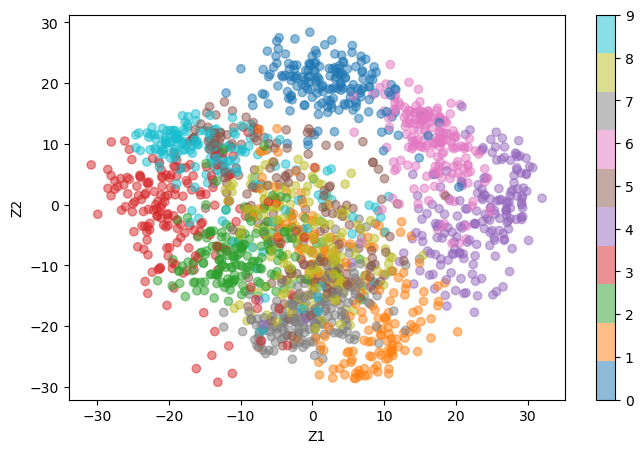

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
im = ax.scatter(Z[:,0], Z[:,1], c=digits_labels, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.5)
plt.colorbar(im)
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()